In [15]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [16]:
# Loading the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [17]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [18]:
# Merge customer and transaction data
customer_transactions = pd.merge(transactions, customers, on="CustomerID")

In [29]:
# Create additional features (e.g., total transaction value per customer)
customer_summary = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique',  # Number of unique transaction dates per customer
}).reset_index()
customer_summary.head()

,CustomerID,TotalValue,Quantity,TransactionDate
0,C0001,3354.52,12,5
1,C0002,1862.74,10,4
2,C0003,2725.38,14,4
3,C0004,5354.88,23,8
4,C0005,2034.24,7,3


In [20]:
# Add customer demographic information
customer_summary = pd.merge(customer_summary, customers[['CustomerID', 'Region']], on="CustomerID")


In [28]:
# Standardize the data for clustering
features = customer_summary[['TotalValue', 'Quantity', 'TransactionDate']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Display the scaled features
scaled_features[:6]

array([[-0.06170143, -0.12203296, -0.01145819],
       [-0.87774353, -0.44800021, -0.46749414],
       [-0.40585722,  0.20393428, -0.46749414],
       [ 1.03254704,  1.67078689,  1.35664965],
       [-0.78392861, -0.93695108, -0.92353008],
       [ 0.41587942, -0.12203296, -0.46749414]])

In [30]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)
# Display the clustered data
customer_summary.head()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,TotalValue,Quantity,TransactionDate,Cluster
0,C0001,3354.52,12,5,2
1,C0002,1862.74,10,4,2
2,C0003,2725.38,14,4,2
3,C0004,5354.88,23,8,0
4,C0005,2034.24,7,3,1


In [23]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8650620583623064


In [24]:
# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_summary['Cluster']


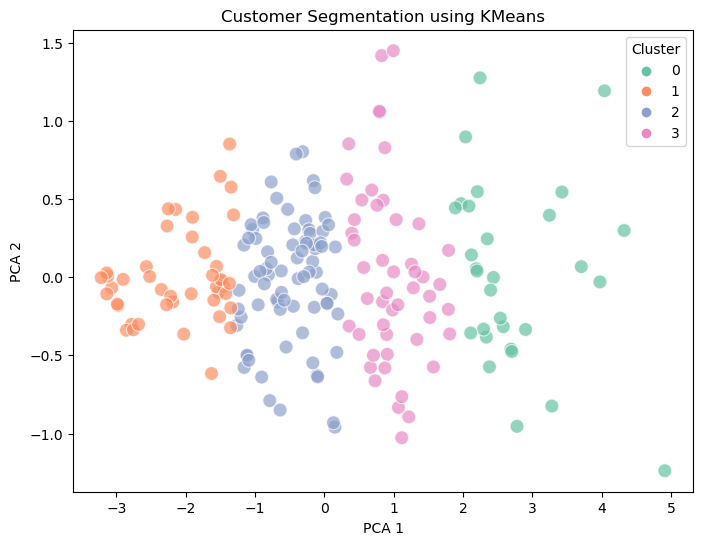

In [25]:
# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7)
plt.title('Customer Segmentation using KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [26]:
# Report Clustering Results
num_clusters = customer_summary['Cluster'].nunique()
print(f'Number of clusters formed: {num_clusters}')
print(f'Davies-Bouldin Index: {db_index}')


Number of clusters formed: 4
Davies-Bouldin Index: 0.8650620583623064
